In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('pre_processed_dataset.csv')
df.head(3)

,time,month,day,quantity_sold_kg,unit_selling_price_rmb/kg,item_name_7 colour pepper,item_name_agaricus bisporus,item_name_aihao,item_name_amaranth,item_name_basil,...,item_name_yuxingcao,item_name_zhijiang red bolt,item_name_zhimaxiancai,item_name_zhuyecai,category_name_aquatic,category_name_cabbage,category_name_capsicum,category_name_flower,category_name_mushroom,category_name_solanum
0,9,1,10,0.4265,19.8,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,9,1,19,0.3170,18.0,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,9,1,20,0.3390,18.0,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [3]:
from sklearn.model_selection import train_test_split
# import tensorflow as tf

In [18]:
# define dependent and non dependent variables
y = df['quantity_sold_kg']
x = df.drop(columns=['quantity_sold_kg'], axis=1)

# split the dataset 0.8, 0.1, 0.1
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# x_eval, x_test, y_eval, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

"""use float32 data type for numerical values to reduce memory usage and improve performance"""

# # convert to tensor arrays
# x_train_tensor = tf.constant(x_train, dtype=tf.float32)
# y_train_tensor = tf.constant(y_train, dtype=tf.float32)
# x_eval_tensor = tf.constant(x_eval, dtype=tf.float32)
# y_eval_tensor = tf.constant(y_eval, dtype=tf.float32)
# 
x_train.shape, x_test.shape

((19839, 133), (4960, 133))

In [19]:
# df_test = pd.concat([y_test.reset_index(drop=True), x_test.reset_index(drop=True)], axis=1)
# df_test.to_csv('../../datasets/testing_dataset.csv')
# df_test.sample(3)

In [20]:
# # convert to tensor arrays
# x_test_tensor = tf.constant(x_test, dtype=tf.float32)
# y_test_tensor = tf.constant(y_test, dtype=tf.float32)

In [21]:
import xgboost as xg 

In [30]:
model = xg.XGBRegressor()
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [31]:
from sklearn.metrics import mean_absolute_error

In [32]:
mean_absolute_error(y_test, pred)

0.07365715353653551

In [9]:
from sklearn.tree import DecisionTreeRegressor 

In [28]:
model = DecisionTreeRegressor()
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [29]:
# Training set
train_pred = model.predict(x_train)
train_error = mean_absolute_error(y_train, train_pred)

# Testing set
test_pred = model.predict(x_test)
test_error = mean_absolute_error(y_test, test_pred)

print(f'Training Error: {train_error}')
print(f'Testing Error: {test_error}')

Training Error: 0.0009345850765327554
Testing Error: 0.09307626881472945


In [26]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [27]:
train_errors = []
test_errors = []

for i in range(1, 101):
    model = RandomForestRegressor(n_estimators=i, random_state=42)
    model.fit(x_train, y_train)
    
    # Training set
    train_pred = model.predict(x_train)
    train_error = mean_absolute_error(y_train, train_pred)
    train_errors.append(train_error)

    # Testing set
    test_pred = model.predict(x_test)
    test_error = mean_absolute_error(y_test, test_pred)
    test_errors.append(test_error)

# Plotting the results
plt.plot(range(1, 101), train_errors, label='Training Error')
plt.plot(range(1, 101), test_errors, label='Testing Error')
plt.title('Random Forest Regression - Training vs Testing Error')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean absolute Error')
plt.legend(loc='upper right')

KeyboardInterrupt: 

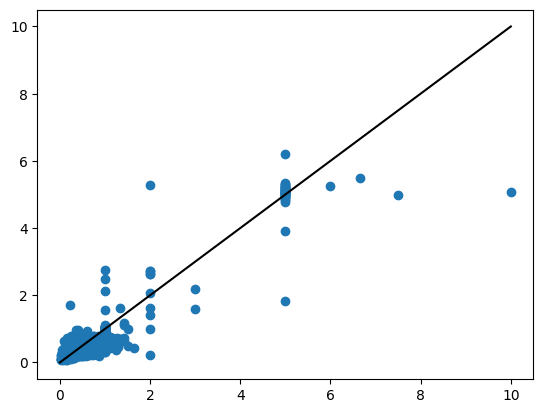

In [34]:
x = [0 , 10]
y = x

plt.scatter(y_test, pred)
plt.plot(x, y, color='black')